### 1.DataLoading

In [1]:
import sys
if sys.version_info[0] < 3:
    raise Exception("Python 3 not detected.")

import numpy as np
import matplotlib as plt
from sklearn import svm
from scipy import io

for data_name in ["mnist", "spam", "cifar10"]:
    data = io.loadmat("data/%s_data.mat" % data_name)
    print("\nloaded %s data!" % data_name)
    fields= "test_data", "training_data", "training_labels"
    for field in fields:
        print(field, data[field].shape)


loaded mnist data!
test_data (10000, 784)
training_data (60000, 784)
training_labels (60000, 1)

loaded spam data!
test_data (5857, 32)
training_data (5172, 32)
training_labels (5172, 1)

loaded cifar10 data!
test_data (10000, 3072)
training_data (50000, 3072)
training_labels (50000, 1)


### 2.Data Partitioning

In [3]:
def shuffleFun(data):
    np.random.shuffle(data)

# For the MNIST dataset, write code that sets aside 10,000 training images as a validation set.
MNIST_data = io.loadmat("data/mnist_data.mat")

#shuffle dataset
np.random.seed(58)
MNIST_tra = MNIST_data["training_data"]
shuffleFun(MNIST_tra)
MNIST_x_val = MNIST_tra[:10000]
MNIST_x_train = MNIST_tra[10000:]

np.random.seed(58)
MNIST_tra_y = MNIST_data["training_labels"]
shuffleFun(MNIST_tra_y)
MNIST_y_val = MNIST_tra_y[:10000]
MNIST_y_train = MNIST_tra_y[10000:]

# For the spam dataset, write code that sets aside 20% of the training data as a validation set.
spam_data = io.loadmat("data/spam_data.mat")

#shuffle dataset
np.random.seed(68)
spam_tra = spam_data["training_data"]
shuffleFun(spam_tra)
spam_x_val = spam_tra[:int(0.2*len(spam_tra))]
spam_x_train = spam_tra[int(0.2*len(spam_tra)):]

np.random.seed(68)
spam_tra_y = spam_data["training_labels"]
shuffleFun(spam_tra_y)
spam_y_val = spam_tra_y[:int(0.2*len(spam_tra))]
spam_y_train = spam_tra_y[int(0.2*len(spam_tra)):]

# For the CIFAR-10 dataset, write code that sets aside 5,000 training images as a validation set.
# Be sure to shuffle your data before splitting it to make sure all the classes are represented in
# your partitions.
cifar10_data = io.loadmat("data/cifar10_data.mat")

#shuffle dataset
np.random.seed(78)
cifar10_tra = cifar10_data["training_data"]
shuffleFun(cifar10_tra)
cifar10_x_val = cifar10_tra[:5000]
cifar10_x_train = cifar10_tra[5000:]

np.random.seed(78)
cifar10_tra_y = cifar10_data["training_labels"]
shuffleFun(cifar10_tra_y)
cifar10_y_val = cifar10_tra_y[:5000]
cifar10_y_train = cifar10_tra_y[5000:]

### 3.Support Vector Machines: Coding

In [2]:
from sklearn import svm
from sklearn import metrics as sm
from matplotlib import pyplot as plt

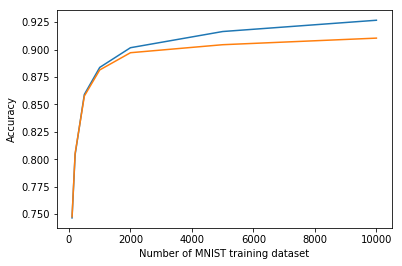

In [4]:
#train the model
clf_mnist = svm.SVC(kernel = 'linear')

dataNum_mnist = [100, 200, 500, 1000, 2000, 5000, 10000]
error_tra_mnist = []
error_val_mnist = []

for num in dataNum_mnist:
    clf_mnist.fit(MNIST_x_train[:num], MNIST_y_train[:num].ravel())
    y_pred_tra = clf_mnist.predict(MNIST_x_train)
    y_pred_val = clf_mnist.predict(MNIST_x_val)
    error_tra_mnist.append(sm.accuracy_score(MNIST_y_train, y_pred_tra))
    error_val_mnist.append(sm.accuracy_score(MNIST_y_val, y_pred_val))

## draw the error line
%matplotlib inline
plt.xlabel("Number of MNIST training dataset")
plt.ylabel("Accuracy")
plt.plot(dataNum_mnist, error_tra_mnist, label="training")
plt.plot(dataNum_mnist, error_val_mnist, label="validation")
plt.show()

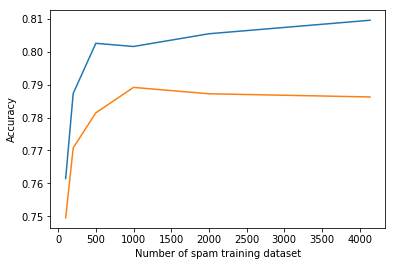

In [5]:
#train the model
clf_spam = svm.SVC(kernel = 'linear')

dataNum_spam = [100, 200, 500, 1000, 2000, len(spam_x_train)]
error_tra_spam = []
error_val_spam = []

for num in dataNum_spam:
    clf_spam.fit(spam_x_train[:num], spam_y_train[:num].ravel())
    y_pred_tra = clf_spam.predict(spam_x_train)
    y_pred_val = clf_spam.predict(spam_x_val)
    error_tra_spam.append(sm.accuracy_score(spam_y_train, y_pred_tra))
    error_val_spam.append(sm.accuracy_score(spam_y_val, y_pred_val))

## draw the error line
%matplotlib inline
plt.xlabel("Number of spam training dataset")
plt.ylabel("Accuracy")
plt.plot(dataNum_spam, error_tra_spam, label="training")
plt.plot(dataNum_spam, error_val_spam, label="validation")
plt.show()

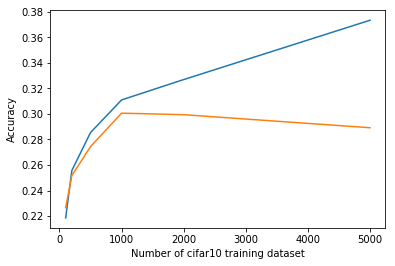

In [6]:
#train the model
clf_cifar10 = svm.SVC(kernel = 'linear')

dataNum_cifar10 = [100, 200, 500, 1000, 2000, 5000]
error_tra_cifar10 = []
error_val_cifar10 = []

for num in dataNum_cifar10:
    clf_cifar10.fit(cifar10_x_train[:num], cifar10_y_train[:num].ravel())
    y_pred_tra = clf_cifar10.predict(cifar10_x_train)
    y_pred_val = clf_cifar10.predict(cifar10_x_val)
    error_tra_cifar10.append(sm.accuracy_score(cifar10_y_train, y_pred_tra))
    error_val_cifar10.append(sm.accuracy_score(cifar10_y_val, y_pred_val))

## draw the error line
%matplotlib inline
plt.xlabel("Number of cifar10 training dataset")
plt.ylabel("Accuracy")
plt.plot(dataNum_cifar10, error_tra_cifar10, label="training")
plt.plot(dataNum_cifar10, error_val_cifar10, label="validation")
plt.show()

### 4.Hyperparameter Tuning

NameError: name 'paramC' is not defined

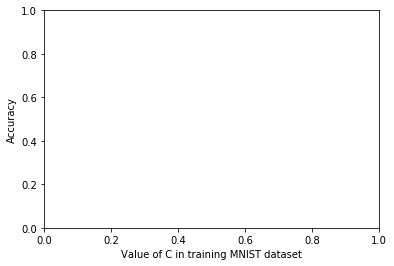

In [7]:
error_tra_mnist_c = []
error_val_mnist_c = []
#train the model
for c in range(-10,10,1):
    clf_mnist_c = svm.SVC(C=10**c, kernel = 'linear')
    clf_mnist_c.fit(MNIST_x_train[:10000], MNIST_y_train[:10000].ravel())
    y_pred_tra = clf_mnist_c.predict(MNIST_x_train)
    y_pred_val = clf_mnist_c.predict(MNIST_x_val)
    error_tra_mnist_c.append(sm.accuracy_score(MNIST_y_train, y_pred_tra))
    error_val_mnist_c.append(sm.accuracy_score(MNIST_y_val, y_pred_val))

## draw the error line
paramC = []
for c in range(-10,10,1):
    paramC.append(c)
    print(c)
    
%matplotlib inline
plt.xlabel("Value of C in training MNIST dataset")
plt.ylabel("Accuracy")
plt.plot(paramC,error_tra_mnist_c, label="training")
plt.plot(paramC, error_val_mnist_c, label="validation")
plt.show()

# 10^-6 should be the best C to have

### 5.K-Fold Cross-Validation

In [4]:
#shuffle dataset
np.random.seed(68)
spam_tra = spam_data["training_data"]
shuffleFun(spam_tra)

np.random.seed(68)
spam_tra_y = spam_data["training_labels"]
shuffleFun(spam_tra_y)

## cross validation
indice = int(0.2*len(spam_tra))
indices = []
for i in range(5):
    indices.append(i*indice)
indices.append(len(spam_tra))

#train the model

error_val_spam = []

for c in range(-10,4,1):
    clf_spam_c = svm.SVC(C=10**c, kernel = 'linear')
    error_val_spam_c = []
    for i in range(5):
        spam_x_val = spam_tra[indices[i]:indices[i + 1]]
        spam_x_train = np.concatenate((spam_tra[0:indices[i]],spam_tra[indices[i + 1]:]), axis = 0)
        print(i*5 + c)
    
        spam_y_val = spam_tra_y[indices[i]:indices[i + 1]]
        spam_y_train = np.concatenate((spam_tra_y[0:indices[i]],spam_tra_y[indices[i + 1]:]), axis = 0)
    
        clf_spam_c.fit(spam_x_train, spam_y_train.ravel())
        y_pred_val = clf_spam_c.predict(spam_x_val)
        error_val_spam_c.append(sm.accuracy_score(spam_y_val, y_pred_val))
    error_val_spam.append(np.average(error_val_spam_c))

-10
-5
0
5
10
-9
-4
1
6
11
-8
-3
2
7
12
-7
-2
3
8
13
-6
-1
4
9
14
-5
0
5
10
15
-4
1
6
11
16
-3
2
7
12
17
-2
3
8
13
18
-1
4
9
14
19
0
5
10
15
20
1
6
11
16
21
2
7
12
17
22
3
8
13
18
23


-10
-9
-8
-7
-6
-5
-4
-3
-2
-1
0
1
2
3


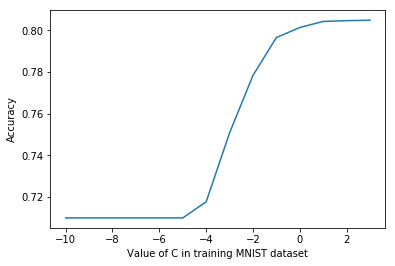

[0.70996728975452383,
 0.70996728975452383,
 0.70996728975452383,
 0.70996728975452383,
 0.70996728975452383,
 0.70996728975452383,
 0.71770124642465061,
 0.75077145396294331,
 0.77842430714771127,
 0.79660313809249983,
 0.8014349939881853,
 0.80433522773948307,
 0.80472207493484083,
 0.8049151251278911]

In [5]:
## draw the error line
paramC = []
for c in range(-10,4,1):
    paramC.append(c)
    print(c)
    
%matplotlib inline
plt.xlabel("Value of C in training MNIST dataset")
plt.ylabel("Accuracy")
plt.plot(paramC, error_val_spam, label="validation")
plt.show()
error_val_spam

### 6.Kaggle

In [4]:
def shuffleFun(data):
    np.random.shuffle(data)

# For the MNIST dataset, write code that sets aside 10,000 training images as a validation set.
MNIST_data = io.loadmat("data/mnist_data.mat")

#shuffle dataset
np.random.seed(58)
MNIST_tra = MNIST_data["training_data"]
shuffleFun(MNIST_tra)
MNIST_test = MNIST_data["test_data"]

np.random.seed(58)
MNIST_tra_y = MNIST_data["training_labels"]
shuffleFun(MNIST_tra_y)

# For the spam dataset, write code that sets aside 20% of the training data as a validation set.
spam_data = io.loadmat("data/spam_data.mat")

#shuffle dataset
np.random.seed(68)
spam_tra = spam_data["training_data"]
shuffleFun(spam_tra)
spam_test = spam_data["test_data"]

np.random.seed(68)
spam_tra_y = spam_data["training_labels"]
shuffleFun(spam_tra_y)

# For the CIFAR-10 dataset, write code that sets aside 5,000 training images as a validation set.
# Be sure to shuffle your data before splitting it to make sure all the classes are represented in
# your partitions.
cifar10_data = io.loadmat("data/cifar10_data.mat")

#shuffle dataset
np.random.seed(78)
cifar10_tra = cifar10_data["training_data"]
shuffleFun(cifar10_tra)
cifar10_test = cifar10_data["test_data"]

np.random.seed(78)
cifar10_tra_y = cifar10_data["training_labels"]
shuffleFun(cifar10_tra_y)

In [5]:
#mnist
clf_mnist = svm.SVC(C=10**(-6), kernel = 'linear')
clf_mnist.fit(MNIST_tra, MNIST_tra_y.ravel())
y_pred_test = clf_mnist.predict(MNIST_test)
np.savetxt('mnist_test.csv', y_pred_test, delimiter = ',')

In [ ]:
#spam
clf_spam = svm.SVC(C=10**2, kernel = 'linear')
clf_spam.fit(spam_tra, spam_tra_y.ravel())
y_pred_test = clf_spam.predict(spam_test)
np.savetxt('spam_test.csv', y_pred_test, delimiter = ',')

In [ ]:
#cifar10
clf_cifar10 = svm.SVC(kernel = 'linear')
clf_cifar10.fit(cifar10_tra, cifar10_tra_y.ravel())
y_pred_test = clf_cifar10.predict(cifar10_test)
np.savetxt('cifar10_test.csv', y_pred_test, delimiter = ',')

##### 7.Theory of Hard-Margin Support Vector Machines